In [105]:
%config IPCompleter.greedy=True

In [106]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
titanic=pd.read_csv('train.csv')

In [108]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
col=titanic.columns
print (col)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [110]:
titanic.shape

(891, 12)

In [111]:
titanic.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [112]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [113]:
[print(columns,np.unique(titanic[columns].isnull())) for columns in col]

PassengerId [False]
Survived [False]
Pclass [False]
Name [False]
Sex [False]
Age [False  True]
SibSp [False]
Parch [False]
Ticket [False]
Fare [False]
Cabin [False  True]
Embarked [False  True]


[None, None, None, None, None, None, None, None, None, None, None, None]

In [114]:
list((columns,np.unique(titanic[columns].astype(str)).size) for columns in col)

[('PassengerId', 891),
 ('Survived', 2),
 ('Pclass', 3),
 ('Name', 891),
 ('Sex', 2),
 ('Age', 89),
 ('SibSp', 7),
 ('Parch', 7),
 ('Ticket', 681),
 ('Fare', 248),
 ('Cabin', 148),
 ('Embarked', 4)]

In [115]:
print ("total_females =",len(titanic[(titanic["Sex"]=="female")].index))
print ("total_males =",len(titanic[(titanic["Sex"]=="male")].index))

total_females = 314
total_males = 577


In [116]:
survived=titanic[(titanic["Sex"]=="male") & (titanic["Survived"]==1)]
len(survived.index)

109

In [117]:
survived=titanic[(titanic["Sex"]=="female") & (titanic["Survived"]==1)]
len(survived.index)

233

In [118]:
print([titanic.groupby("Sex")["Survived"].value_counts(normalize = True)])

[Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64]


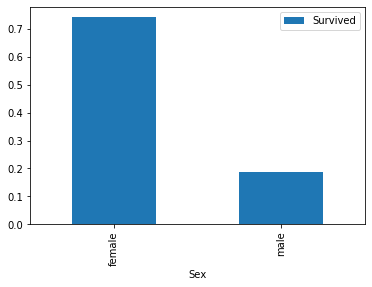

In [119]:
class_pivot=titanic.pivot_table(index="Sex",values="Survived")
class_pivot.plot.bar()
plt.show()

In [120]:
print("Pclass_1=",len(titanic[(titanic["Pclass"]==1)].index))
print("Pclass_2=",len(titanic[(titanic["Pclass"]==2)].index))
print("Pclass_3=",len(titanic[(titanic["Pclass"]==3)].index))

Pclass_1= 216
Pclass_2= 184
Pclass_3= 491


In [121]:
tot_pass=titanic["Pclass"].value_counts().sort_index()
print(tot_pass)

1    216
2    184
3    491
Name: Pclass, dtype: int64


In [122]:
survived_class =[titanic.groupby("Pclass")["Survived"].sum()]
print(survived_class)

[Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64]


In [123]:
print([titanic.groupby("Pclass")["Survived"].value_counts(normalize=True)])

[Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64]


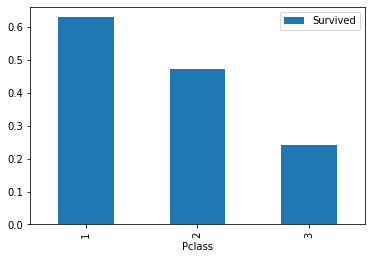

In [124]:
class_pivot=titanic.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar()
plt.show()

In [125]:
coorelation_matrix=titanic.corr(method='pearson')
coorelation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


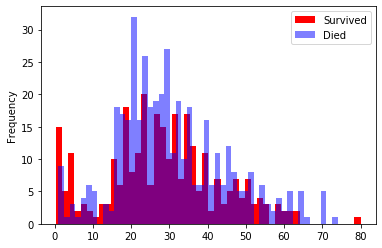

In [126]:
survived=titanic[titanic["Survived"]==1]
died= titanic[titanic["Survived"]==0]
survived["Age"].plot.hist(color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [127]:
titanic_copy=titanic
titanic_copy["Age"]=titanic_copy["Age"].fillna(titanic['Age'].mean(),inplace=False)

In [128]:
titanic_copy.shape

(891, 12)

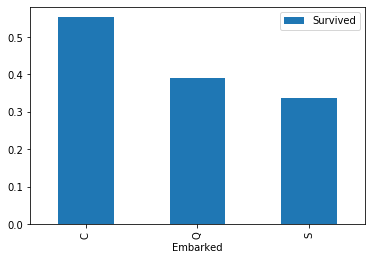

In [129]:
class_pivot=titanic.pivot_table(index="Embarked",values="Survived")
class_pivot.plot.bar()
plt.show()

In [130]:
titanic_copy=titanic_copy.dropna(subset=["Sex","Pclass","Embarked","Age"])

In [131]:
titanic_copy.shape

(889, 12)

In [132]:
Y_titanic=titanic_copy.loc[:,"Survived"]
X_titanic=titanic_copy.loc[:,["Age","Sex","Pclass","Embarked"]]

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
age = scaler.fit_transform(X_titanic["Age"].values.reshape(-1,1))
X_titanic["Age"]=age

In [134]:
X_titanic_he=pd.get_dummies(X_titanic,columns=["Pclass","Sex","Embarked"])
X_titanic_he.head()

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.590495,0,0,1,0,1,0,0,1
1,0.643971,1,0,0,1,0,1,0,0
2,-0.281878,0,0,1,1,0,0,0,1
3,0.412509,1,0,0,1,0,0,0,1
4,0.412509,0,0,1,0,1,0,0,1


In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_titanic_he,Y_titanic,test_size=0.3,random_state=0)

In [136]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(min_samples_split=70,min_samples_leaf=10)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.7790262172284644

In [137]:
from sklearn.metrics import precision_score
precision_score(Y_test,Y_pred)

0.8227848101265823

In [138]:
from sklearn.metrics import recall_score
recall_score(Y_test,Y_pred)

0.5909090909090909

In [139]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,min_samples_split=50)
clf=clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

accuracy_score(Y_test,Y_pred)

0.7790262172284644

In [140]:
print("Precision=",precision_score(Y_test,Y_pred))
print("Recall=",recall_score(Y_test,Y_pred))

Precision= 0.84
Recall= 0.5727272727272728


In [141]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

accuracy_score(Y_test,Y_pred)

0.7528089887640449

In [142]:
print("Precision=",precision_score(Y_test,Y_pred))
print("Recall=",recall_score(Y_test,Y_pred))

Precision= 0.6964285714285714
Recall= 0.7090909090909091


In [143]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

accuracy_score(Y_test,Y_pred)

0.7528089887640449

In [144]:
print("Precision=",precision_score(Y_test,Y_pred))
print("Recall=",recall_score(Y_test,Y_pred))


Precision= 0.6964285714285714
Recall= 0.7090909090909091


In [145]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0,solver='sag',multi_class='multinomial').fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7677902621722846

In [146]:
print("Precision=",precision_score(Y_test,Y_pred))
print("Recall=",recall_score(Y_test,Y_pred))

Precision= 0.7553191489361702
Recall= 0.6454545454545455


In [147]:
from sklearn import svm
clf=svm.SVC().fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

accuracy_score(Y_test,Y_pred)

0.7940074906367042

In [148]:
print("Precision=",precision_score(Y_test,Y_pred))
print("Recall=",recall_score(Y_test,Y_pred))

Precision= 0.8666666666666667
Recall= 0.5909090909090909
